In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

dataFromRatraNew = np.array([
        [0.070, 69.,19.6],
        [0.090,69.,12.],
        [0.120,68.6,26.2],
        [0.170,83.,8.],
        [0.179,75.,4.],
        [0.199,75.,5.],
        [0.200,72.9,29.6],
        [0.270,77.0,14.],
        [0.280,88.8,36.6],
        [0.352,83.,14.],
        [0.3802,83.,13.5],
        [0.400,95.,17.],
        [0.4004,77.,10.2],
        [0.4247,87.1,11.2],
        # [0.440,82.6,7.8], #The last paper of Yu ratra et al 2017, arXiv:1711.03437v1
        #discard this measurement.
        [0.4497,92.8,12.9],
        [0.47, 89.0, 50.0],
        #Here the [0.47, 89.0, 50.0] measurement is added to the list.
        [0.4783,80.9,9.],
        [0.480,97.,62.],
        [0.593,104.,13.],
        # [0.600,87.9,6.1], ###??? it is not in the list YuRattra
        [0.680,92.,8.],
        # [0.730,97.3,2.1], ###??? it is not in the list
        [0.781,105.,12.],
        [0.875,125.,17.],
        [0.880,90.,40.],
        [0.900,117.,23.],
        [1.037,154.,20.],
        [1.300,168.0,17.],
        [1.363,160.,33.6],
        [1.430,177.,18.],
        [1.530,140.,14.],
        [1.750,202.,40.],
        [1.965,186.5,50.4] ])

In [2]:
#Takes redsdift(z) and a vector of parameters
def lCDM(z,fpars):
  
  Om_m0 = fpars[0]
  H_0 = fpars[1]
  E = (Om_m0*(1+z)**3 + 1-Om_m0)**0.5
  return E*H_0

In [3]:
def chisq(pars): 
  sum_chisq  = 0
  for dpoint in dataFromRatraNew:
    z = dpoint[0] 
    theorH = lCDM(z,pars)
    sigma = dpoint[2]
    H_obs = dpoint[1]
    x = (H_obs - theorH)**2 / sigma**2
    sum_chisq = sum_chisq + x
  return sum_chisq

In [4]:
x0 = np.array([0,0])
result= opt.minimize(chisq, x0)

In [5]:
pars = [1.00,72.0]
print(f"x^2[{pars[0]},{pars[1]}]:= {chisq(pars)} \n" )

best_pars=result.x
print(f"x^2[{round(best_pars[0],3)},{round(best_pars[1],3)}]:= {chisq(best_pars)} ")


x^2[1.0,72.0]:= 457.16367129828075 

x^2[0.32,68.15]:= 14.499985774271122 


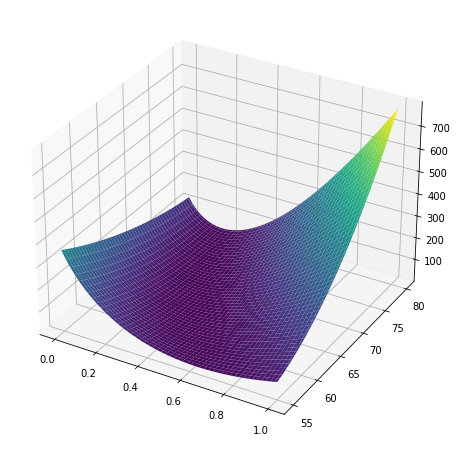

In [6]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

sample_rate=100
Om_space = np.linspace(0,1, sample_rate)
H0_space  = np.linspace(55,80, sample_rate)

xx, yy = np.meshgrid(Om_space, H0_space)

Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

result=chisq([Xgrid[:,0], Xgrid[:,1]])

fig=plt.figure(figsize=(13,8))
ax=plt.gca(projection='3d')
Z=result.reshape(xx.shape)
ax.plot_surface(xx,yy,Z,cmap='viridis');

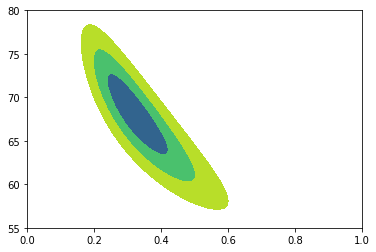

In [7]:
chisq_min=min(result)
sigma1 = 2.32 + chisq_min
sigma2 = 6.18 + chisq_min 
sigma3 = 11.8 + chisq_min
levels = [0,sigma1,sigma2,sigma3]

plt.contourf(xx,yy,Z,levels);